In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf


In [ ]:
ipl = pd.read_csv('/content/drive/MyDrive/ipl_data.csv')
ipl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [ ]:
X = df.drop(['total'], axis =1)
y = df['total']


In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [ ]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define the neural network model
model = keras.Sequential([
	keras.layers.Input( shape=(X_train_scaled.shape[1],)), # Input layer
	keras.layers.Dense(512, activation='relu'), # Hidden layer with 512 units and ReLU activation
	keras.layers.Dense(216, activation='relu'), # Hidden layer with 216 units and ReLU activation
	keras.layers.Dense(1, activation='linear') # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0) # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss) # Use Huber loss for regression


In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
832/832 [==============================] - 8s 4ms/step - loss: 32.7116 - val_loss: 22.3244
Epoch 2/50
832/832 [==============================] - 3s 3ms/step - loss: 22.3370 - val_loss: 22.3734
Epoch 3/50
832/832 [==============================] - 5s 5ms/step - loss: 22.2972 - val_loss: 22.0482
Epoch 4/50
832/832 [==============================] - 4s 5ms/step - loss: 22.2820 - val_loss: 21.8901
Epoch 5/50
832/832 [==============================] - 3s 3ms/step - loss: 22.1832 - val_loss: 21.9831
Epoch 6/50
832/832 [==============================] - 4s 4ms/step - loss: 22.1971 - val_loss: 21.8775
Epoch 7/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1410 - val_loss: 21.8929
Epoch 8/50
832/832 [==============================] - 3s 4ms/step - loss: 22.1251 - val_loss: 21.8067
Epoch 9/50
832/832 [==============================] - 3s 4ms/step - loss: 22.1598 - val_loss: 21.9830
Epoch 10/50
832/832 [==============================] - 3s 4ms/step - loss: 22.1106

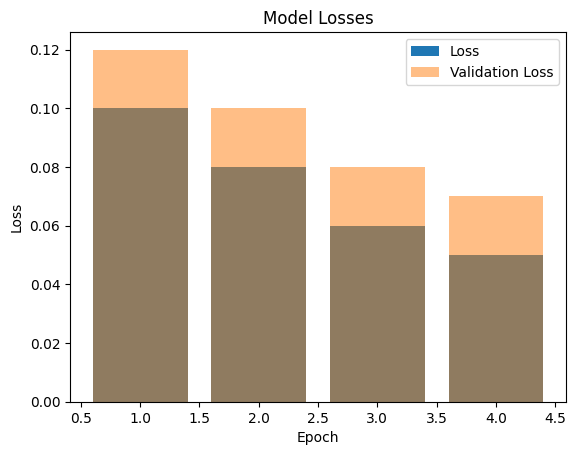

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd  # Assuming you are using pandas for DataFrame

# Assuming model_losses is a DataFrame with columns 'loss', 'val_loss', and an index
# Example creation of model_losses DataFrame
model_losses = pd.DataFrame({
    'loss': [0.1, 0.08, 0.06, 0.05],  # Example values for loss
    'val_loss': [0.12, 0.1, 0.08, 0.07]  # Example values for validation loss
}, index=range(1, 5))  # Example index, assuming epochs from 1 to 4

# Create bar plot for model losses
plt.bar(model_losses.index, model_losses['loss'], label='Loss')
plt.bar(model_losses.index, model_losses['val_loss'], label='Validation Loss', alpha=0.5)  # Set alpha to differentiate bars
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Losses')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Assuming X_test_scaled and y_test are defined elsewhere in your code

# Check for missing values in X_test_scaled
missing_values_X = np.isnan(X_test_scaled).any()

# Check for missing values in y_test
missing_values_y = np.isnan(y_test).any()

print("Missing values in X_test_scaled:", missing_values_X)
print("Missing values in y_test:", missing_values_y)


Missing values in X_test_scaled: False
Missing values in y_test: False


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
	with output:
		clear_output() # Clear the previous output


		# Decode the encoded values back to their original values
		decoded_venue = venue_encoder.transform([venue.value])
		decoded_batting_team = batting_team_encoder.transform([batting_team.value])
		decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
		decoded_striker = striker_encoder.transform([striker.value])
		decoded_bowler = bowler_encoder.transform([bowler.value])


		input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
		input = input.reshape(1,5)
		input = scaler.transform(input)
		#print(input)
		predicted_score = model.predict(input)
		predicted_score = int(predicted_score[0,0])

		print(predicted_score)


In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', index=1, options=('Kolkata Knight Riders', 'Chennai Super Kings',…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', index=8, options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Husse…

Dropdown(description='Select Bowler:', index=11, options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB J…

Button(description='Predict Score', style=ButtonStyle())

Output()